# Training a NN

In [6]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

In [8]:
# using the sequential() container, define a single layer network and store it in model
input_units = 10
output_units = 1
model = nn.Sequential(nn.Linear(input_units, output_units), nn.Sigmoid())

Create dummy input data and dummy target data

In [9]:
x = torch.randn(20,10)
y = torch.randint(0, 2, (20,1)).type(torch.FloatTensor)

Define an Optimization algorithm as the 'Adam' optimizer, with a learning rate of 0.01

In [11]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [12]:
print(model)

Sequential(
  (0): Linear(in_features=10, out_features=1, bias=True)
  (1): Sigmoid()
)


Create the same loss function as before

In [13]:
loss_funct = nn.MSELoss()

In [14]:
# train the model twenty times
losses = []
for i in range(20):
    y_pred = model(x)
    loss = loss_funct(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%5 == 0:
        print(i, loss.item())

0 0.22266308963298798
5 0.2048090398311615
10 0.18995118141174316
15 0.1772604137659073


We can see that the optimizer is making whatever choices it thinks will cause the loss to go down, and that is shown in the graph below

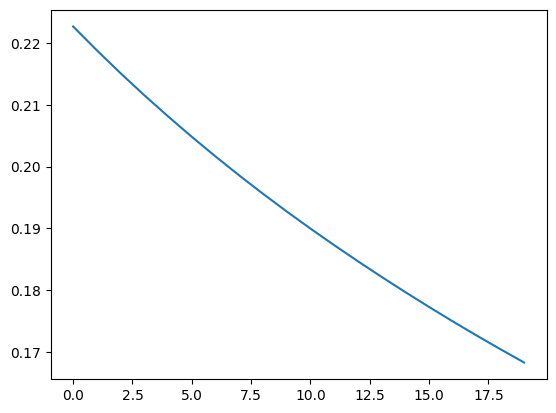

In [15]:
plt.plot(range(0,20), losses)
plt.show()